# PyGSI
Created by Kevin Dougherty  
December 2020
## Description:
PyGSI is a collection of scripts used to read, plot, and save statistics of GSI diagnostic data. The purpose of this tool is to provide insight to users on the performance of GSI cycles. The ultimate goal is to use this tool to extract GSI diagnostic data to compare with JEDI data to validate the performance of both.


### Clone from Github
The Github repository can be found here : [https://github.com/kevindougherty-noaa/PyGSI](https://github.com/kevindougherty-noaa/PyGSI)  
and can be cloned by:

```$ git clone https://github.com/kevindougherty-noaa/PyGSI```

### Activating Anaconda and Python Environments
Currently, we only have access to use the tool on Hera. We are working to get the proper modules including YAML on machines like WCOSS. To activate the proper anaconda build and python environments, run the following commands in your `PyGSI` directory:  
  
  
If using bash shell:  
```$ source modulefiles/modulefile.PyGSI.hera.bash```  
  
If using tcsh shell:  
```$ source modulefiles/modulefile.PyGSI.hera.tcsh```

## Using PyGSI
Here, we will explore some of the most important features of PyGSI so that a user can create their own python scripts.

### Diags.py
This script is responsible for reading and properly indexing the GSI diagnostic NetCDF data it is given. There are two main classes that are used: `Conventional()` and `Radiance()`. Further information on these classes can be found in the [PyGSI documentation](https://docs.google.com/document/d/1tHAm7EZUCqzreD11oMv82yDRAuaApCD0LmTim-8ifbs/edit).  
  
Let's import these and see how it works:

In [1]:
from pyGSI.diags import Conventional, Radiance

### Conventional()
Starting with a sample diagnostic file. Here we are looking at temperature for cycle 20200922. Calling `Conventional(diagnosticFile)` creates a python object.

In [2]:
diagnosticFile = '/scratch2/NCEPDEV/stmp1/Kevin.Dougherty/ncDiags/gdas.20200920/00/atmos/diag_conv_t_ges.2020092000.nc4'

diag = Conventional(diagnosticFile)

print(f'The length of diag is: {len(diag)}')
print(f'Description of what diags is: {str(diag)}')

The length of diag is: 185438
Description of what diags is: Conventional object


If you are interested what is within this object, you can use the following command to see the different data that is extracted from the diagnostic netcdf file. 

In [3]:
diag.__dict__

{'path': '/scratch2/NCEPDEV/stmp1/Kevin.Dougherty/ncDiags/gdas.20200920/00/atmos/diag_conv_t_ges.2020092000.nc4',
 'variable': 't',
 'o_type': masked_array(data=[180, 180, 180, ..., 180, 133, 133],
              mask=False,
        fill_value=999999,
             dtype=int32),
 'o_stype': masked_array(data=[1, 1, 1, ..., 0, 0, 0],
              mask=False,
        fill_value=999999,
             dtype=int32),
 'lons': masked_array(data=[  6.2 ,   5.7 ,   3.3 , ..., 356.91, 355.95, 355.59],
              mask=False,
        fill_value=1e+20,
             dtype=float32),
 'lats': masked_array(data=[-31.7 , -31.5 , -29.3 , ...,  80.95,  78.15,  79.13],
              mask=False,
        fill_value=1e+20,
             dtype=float32),
 'press': masked_array(data=[1025. , 1026. , 1025. , ..., 1002.9,  250. ,  250. ],
              mask=False,
        fill_value=1e+20,
             dtype=float32),
 'time': masked_array(data=[-1.     , -3.     , -3.     , ..., -1.91667,  2.64   ,
              

#### get_data()
Now that all these variables are stored in the python object `diag`, we can run the method `get_data()` to extract the type of data we want. Below shows the documentation string that describes what the function does, what needs to be inputted, and wha

In [4]:
print(diag.get_data.__doc__)


        Given parameters, get the data from a conventional diagnostic file
        INPUT:
            required:
                dtype  : type of data to extract i.e. Observation, O-F, O-A, H(x)

            optional:    
                obsid        : observation measurement ID number; default=None
                subtype      : observation measurement ID subtype number, default=None
                analysis_use : if True, will return two sets of data: assimlated
                               (analysis_use_flag=1), and monitored (analysis_use
                               _flag=-1); default = False
                plvls        : if True, will return a dictionary of data subsetting 
                               into pressure levels

        OUTPUT:
            data   : requested data
        


A data type (dtype) is required to run this method. The options are:
  * 'observation' - gets observational data
  * 'O-F' - Observation minus Forecast (adjusted) ** keep in mind this is for ges.nc4
  * 'O-A' - Observation minus Analysis (adjusted) ** keep in mind this is for anl.nc4
  * 'H(x)' - H(x) data

Let's take a look at 'O-F':

In [5]:
data_type = 'O-F'

data = diag.get_data(data_type)
print(data)

[ 3.2536466   2.909331    0.23255382 ...  1.0115776   0.39383203
 -1.1454229 ]


#### Additional input options for conventional data
##### obsid
For conventional data, we can choose specifically what type of observation we want our data to have by indicating the observation id number. Here is a list of the valid numbers:
        
        120: "Rawinsonde",
        126: "RASS",
        130: "Aircraft: AIREP and PIREP",
        131: "Aircraft: AMDAR",
        132: "Flight-Level Reconnaissance and Profile Dropsonde",
        133: "Aircraft: MDCRS ACARS",
        134: "Aircraft: TAMDAR",
        135: "Aircraft: Canadian AMDAR",
        153: "GPS-Integrated Precipitable Water",
        180: "Surface Marine w/ Station Pressure (Ship, Buoy, C-MAN, Tide Guage)",
        181: "Surface Land w/ Station Pressure (Synoptic, METAR)",
        182: "Splash-Level Dropsonde Over Ocean",
        183: "Surface Marine or Land - Missing Station Pressure",
        187: "Surface Land - Missing Station Pressure",
        210: "Synthetic Tropical Cyclone",
        220: "Rawinsonde",
        221: "PIBAL",
        224: "NEXRAD Vertical Azimuth Display",
        228: "Wind Profiler: JMA",
        229: "Wind Profiler: PIBAL",
        230: "Aircraft: AIREP and PIREP",
        231: "Aircraft: AMDAR",
        232: "Flight-Level Reconnaissance and Profile Dropsonde",
        233: "Aircraft: MDCRS ACARS",
        234: "Aircraft: TAMDAR",
        235: "Aircraft: Canadian AMDAR",
        242: "JMA IR (Longwave) and Visible Cloud Drift Below 850mb (GMS, MTSAT, HIMAWARI)",
        243: "EUMETSAT IR (Longwave) and Visible Cloud Drift Below 850mb (METEOSAT)",
        245: "NESDIS IR (Longwave) Cloud Drift (All Levels)",
        246: "NESDIS Imager Water Vapor (All Levels) - Cloud Top (GOES)",
        250: "JMA Imager Water Vapor (All Levels) - Cloud Top & Deep Layer (GMS, MTSAT, HIMAWARI)",
        251: "NESDIS Visible Cloud Drift (All Levels) (GOES)",
        252: "JMA IR (Longwave) and Visible Cloud Drift Above 850mb (GMS, MTSAT, HIMAWARI)",
        253: "EUMETSAT IR (Longwave) and Visible Cloud Drift Above 850mb (METEOSAT)",
        254: "EUMETSAT Imager Water Vapor (All Levels) - Cloud Top & Deep Layer (METEOSAT)",
        257: "MODI/POES IR (Longwave) Cloud Drift (All Levels) (AQUA, TERRA)",
        258: "MODIS/POES Imager Water Vapor (All Levels) - Cloud Top (AQUA, TERRA)",
        259: "MODIS/POES Imager Water Vapor (All Levels) - Deep Layer (AQUA, TERRA)",
        280: "Surface Marine w/ Station Pressure (Ship, Buoy, C-MAN, Tide Guage)",
        281: "Surface Land w/ Station Pressure (Synoptic, METAR)",
        282: "ATLAS Buoy",
        284: "Surface Marine or Land - Missing Station Pressure",
        287: "Surface Land (METAR) - Missing Station Pressure",
        289: "SUPEROBED (1.0 Lat/Lon) Scatterometer Winds over Ocean",
        290: "Non-SUPEROBED Scatterometer Winds over Ocean"
        
Let's choose Rawinsondes (120) and compare the size of `data`:

In [6]:
obs_id = [120]

data_rawinsondes = diag.get_data(data_type, obsid=obs_id)

print(f'Length of data without rawinsondes ID: {len(data)}')
print(f'Length of data with rawinsondes ID: {len(data_rawinsondes)}')

Length of data without rawinsondes ID: 185438
Length of data with rawinsondes ID: 29475


##### Subtype
Some data contain specific subtypes of data, so to run batch scripts, we needed to include this. However, it is an optional input and default is `None`. For this specific file, there is only one subgroup (0) so the lengths will be the same.

In [7]:
subtype = 0

data_rawinsondes_subtype = diag.get_data(data_type, obsid=obs_id, subtype=subtype)

print(f'Length of data without rawinsondes ID: {len(data)}')
print(f'Length of data with rawinsondes ID: {len(data_rawinsondes)}')
print(f'Length of data with rawinsondes ID and subtype: {len(data_rawinsondes_subtype)}')

Length of data without rawinsondes ID: 185438
Length of data with rawinsondes ID: 29475
Length of data with rawinsondes ID and subtype: 29475


##### Analysis_use  
If True, will return two sets of data as a dictionary separated as assimilated and monitored data. The default is False.

In [8]:
analysis_use = True

data_rawinsondes_anl_use = diag.get_data(data_type, obsid=obs_id, analysis_use=analysis_use)

print(f'Length of data without rawinsondes ID: {len(data)}')
print(f'Length of data with rawinsondes ID: {len(data_rawinsondes)}')
print(f"Length of data with rawinsondes that were assimilated: {len(data_rawinsondes_anl_use['assimilated'])}")
print(f"Length of data with rawinsondes that were monitored: {len(data_rawinsondes_anl_use['monitored'])}")

Length of data without rawinsondes ID: 185438
Length of data with rawinsondes ID: 29475
Length of data with rawinsondes that were assimilated: 29196
Length of data with rawinsondes that were monitored: 279


### Radiance()
`Radiance()` is similar to `Conventional()`, however takes slightly different input arguments and is used for reading satellite diagnostic files.

In [9]:
diagnosticFile = '/scratch2/NCEPDEV/stmp1/Kevin.Dougherty/ncDiags/gdas.20200922/00/atmos/diag_amsua_metop-a_ges.2020092200.nc4'

diag = Radiance(diagnosticFile)

print(diag)

radiance object


#### get_data()
Similar as to the conventional data method, `Radiance()` has a method `get_data()`. Let's print out the inputs needed.

In [10]:
print(diag.get_data.__doc__)


        Given parameters, get the data from a radiance 
        diagnostic file.
        INPUT:
            required:
                dtype : type of data to extract i.e. observation, O-F, O-A, H(x), Water_Fraction,
                        Land_Fraction, Ice_Fraction, Snow_Fraction

            optional:  
                channel           : observation channel number
                qcflag            : qc flag (default: None) i.e. 0, 1
                separate_channels : if True, calls get_data_special() and returns dictionary
                                    of separate data by specified channels
                separate_qc       : if True, calls get_data_special() and returns dictionary
                                    of separate data by specified QC flags
                errcheck          : when true, and qc==0, will toss out obs where inverse
                                    obs error is zero (i.e. not assimilated in GSI)
        OUTPUT:
            data : requested dat

In [11]:
data_type = 'O-F'

data = diag.get_data(data_type)
data

masked_array(data=[ 0.5613957 , -2.3644938 , -4.57446   , ...,
                   -0.37493172, -2.527277  ,  1.2431635 ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

#### Adding channels
When adding channels, you can call one or multiple different channels and `get_data()` will extract a subset of that data.

In [12]:
channel = [1]

data_channel = diag.get_data(data_type, channel=channel)

print(f'Length of data without specified channels: {len(data)}')
print(f'Length of data with channels: {len(data_channel)}')

Length of data without specified channels: 134160
Length of data with channels: 8944


In [13]:
channels = [1,2,3]

data_channel = diag.get_data(data_type, channel=channels)

print(f'Length of data without specified channels: {len(data)}')
print(f'Length of data with channels: {len(data_channel)}')

Channel specified not in sensor_chan, using relative index
Length of data without specified channels: 134160
Length of data with channels: 26832


`get_data()` can also support returning data for seperate channels. For example, if you want to have multiple channel data, but you want to seperate it into individual datasets, you can do the following:

In [14]:
channels = [1,2,3]

data_multiChannel = diag.get_data(data_type, channel=channels, separate_channels=True)
data_multiChannel

{'Channel_1': masked_array(data=[ 0.5613957 , -0.45674136,  0.7055958 , ...,
                    -2.0303464 , -1.7642787 , -0.6408603 ],
              mask=False,
        fill_value=1e+20,
             dtype=float32),
 'Channel_2': masked_array(data=[-2.3644938, -2.662669 , -1.6714493, ..., -2.3285694,
                     1.3167048,  1.1136903],
              mask=False,
        fill_value=1e+20,
             dtype=float32),
 'Channel_3': masked_array(data=[-4.57446   ,  0.10291837, -2.096714  , ...,
                    -1.509259  , -0.52065414, -2.2067807 ],
              mask=False,
        fill_value=1e+20,
             dtype=float32)}

The data is now in a dictionary and each channel can be called explicitly:

In [15]:
data_multiChannel['Channel_1']

masked_array(data=[ 0.5613957 , -0.45674136,  0.7055958 , ...,
                   -2.0303464 , -1.7642787 , -0.6408603 ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

#### Adding QC flags
Similar concept as above, we can also apply QC flags to the data

In [16]:
QC_flags = [0]

data_qc = diag.get_data(data_type, qcflag=QC_flags)

print(f'Length of data without specified QC Flags: {len(data)}')
print(f'Length of data with QC Flags: {len(data_qc)}')

Length of data without specified QC Flags: 134160
Length of data with QC Flags: 95515


If you want to add multiple QC flags, that is also a capability. For example, if you want to check for some specific rejected data from a particular diagnostic file:

In [18]:
QC_flags = [3,4,8]

data_multiQC = diag.get_data(data_type, qcflag=QC_flags, separate_qc=True)

print(data_multiQC.keys())

dict_keys(['QC_Flag_3', 'QC_Flag_4', 'QC_Flag_8'])


#### Combination of Channels and QC Flags
PyGSI also has the capability to apply both Channels and QC Flags

In [19]:
channel = [1]

data_channel = diag.get_data(data_type, channel=channel)

QC_flags = [0]

data_qc = diag.get_data(data_type, qcflag=QC_flags)

print(f'Length of data with channels: {len(data_channel)}')
print(f'Length of data with QC Flags: {len(data_qc)}')

data_combined = diag.get_data(data_type, channel=channel, qcflag=QC_flags)

print(f'Length of data with channels and QC Flags: {len(data_combined)}')

Length of data with channels: 8944
Length of data with QC Flags: 95515
Length of data with channels and QC Flags: 5589


Additionally, if you want data from specific channels and specific QC Flags:

In [21]:
channels = [1,2,3]
QC_flags = [0,3,4]

data_multicombined = diag.get_data(data_type, channel=channels, qcflag=QC_flags,
                                   separate_channels=True, separate_qc=True)

for i in data_multicombined.keys():
    for j in data_multicombined[i].keys():
        print(f'Length of data in {i} and {j}: ', len(data_multicombined[i][j]))

Length of data in Channel_1 and QC_Flag_0:  8944
Length of data in Channel_1 and QC_Flag_3:  35
Length of data in Channel_1 and QC_Flag_4:  13
Length of data in Channel_2 and QC_Flag_0:  8944
Length of data in Channel_2 and QC_Flag_3:  16
Length of data in Channel_2 and QC_Flag_4:  12
Length of data in Channel_3 and QC_Flag_0:  8944
Length of data in Channel_3 and QC_Flag_3:  37
Length of data in Channel_3 and QC_Flag_4:  13


## Plotting
Now we are able to use either `Conventional()` or `Radiance()` and apply Observation IDs, channels, QC flags, etc. to extract data from a specified diagnostic netCDF file. We can now use this data to make plots. It can be as simple as a basic histogram or a more complicated spatial plot. This notebook will go through several examples.  
#### Histograms
If you are not familiar with Python, the data type we extracted is a numpy array. NumPy is a powerful tool in Python and more information can be found here: [numpy.org](https://numpy.org/). Being that our data is a numpy array, we can plot a basic histogram with only a few lines of code. However, first we need to import the numpy library and the [matplotlib](https://matplotlib.org/3.1.1/index.html) library.

In [22]:
import numpy as np
import matplotlib.pyplot as plt

For clarity, let's redefine our data using the same 'O-F' conventional temperature netCDF data we used earlier and plot just rawinsonde data. With only a few lines of code, we can plot a histogram!

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 1.5230e+04, 1.5097e+04]),
 array([-1.20506920e+02, -1.07105751e+02, -9.37045822e+01, -8.03034134e+01,
        -6.69022446e+01, -5.35010757e+01, -4.00999069e+01, -2.66987400e+01,
        -1.32975712e+01,  1.03596970e-01,  1.35047655e+01], dtype=float32),
 <a list of 10 Patch objects>)

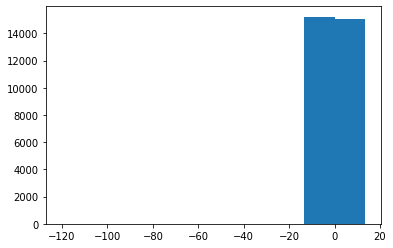

In [23]:
# Reading data
diagnosticFile = '/scratch2/NCEPDEV/stmp1/Kevin.Dougherty/ncDiags/gdas.20200922/00/atmos/diag_conv_t_ges.2020092200.nc4'

diag = Conventional(diagnosticFile)

data_type = 'O-F'
obs_id = 120

data = diag.get_data(data_type, obsid=obs_id)

# Plotting Data
fig = plt.figure()
ax = fig.add_subplot(111)
plt.hist(data)

It's a histogram, but a pretty ugly one. We can fix this pretty easily, it will just require a few extra lines of code to make statistically proper bin sizes and bins as well as add some labels. 

n: 30330
mean: 0.0944015383720398
std: 1.51898992061615
max: 13.504765510559082
min: -120.50691986083984
binsize:  0.7694961887713232


Text(0.5, 1.0, 'Temperature from Rawinsondes')

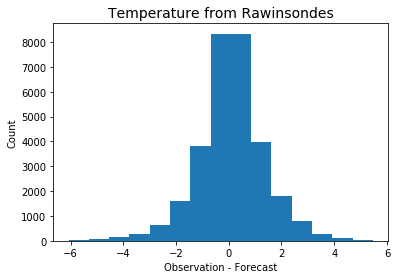

In [24]:
# Get basic statistics using numpy
n = len(data)
mean = np.mean(data)
std = np.std(data)
mx = np.max(data)
mn = np.min(data)

print(f'n: {n}\nmean: {mean}\nstd: {std}\nmax: {mx}\nmin: {mn}')

# Make proper bin sizes using the equation max-min/sqrt(n). Then
# extend the bin range to 4x the standard deviation
binsize = (mx-mn)/np.sqrt(n)
print('binsize: ', binsize)
bins = np.arange(0-(4*std),0+(4*std),binsize)

# Now plot figure
fig = plt.figure()
ax = fig.add_subplot(111)
plt.hist(data, bins=bins)

# Add labels
plt.xlabel('Observation - Forecast')
plt.ylabel('Count')
plt.title('Temperature from Rawinsondes', fontsize=14)


#### Spatial Plots
Let's plot a spatial plot using satellite data. It is a little more complicated and requires a few more libraries including [Cartopy](https://scitools.org.uk/cartopy/docs/latest/).

In [25]:
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature

diagnosticFile = '/scratch2/NCEPDEV/stmp1/Kevin.Dougherty/ncDiags/gdas.20200922/00/atmos/diag_amsua_metop-a_ges.2020092200.nc4'

diag = Radiance(diagnosticFile)

data_type = 'O-F'
data = diag.get_data(data_type)

Both `Radiance()` and `Conventional()` have a function called `get_lat_lon()` that get the proper indexed lat and lon based on your inputs. Right now we are not declaring a specific satellite channel or qc flag, so we will let it remain empty and get our lats and lons to plot spatially.

In [26]:
# Grab lat and lon data from diagnostic file object
lats, lons = diag.get_lat_lon()

The next few lines of code will produce a spatial plot of the globe with the projected radiance O-F data. Each line is explained below:
1. Create the figure

2. Create the axes using the projection ccrs.PlateCarree and set central_longitude=0 (Projections can be found in this [link](https://scitools.org.uk/cartopy/docs/latest/crs/projections.html))

3. Adding coastlines to the figure. Details can be found [here](https://scitools.org.uk/cartopy/docs/v0.16/matplotlib/feature_interface.html)
    * I actually had some trouble figruing out how to plot borders. Typically you can run the command `ccrs.feature.COASTLINE`, however I do not believe that the firewalls for our machines at EMC like where the data comes from ([http://www.naturalearthdata.com/](http://www.naturalearthdata.com/)). If anyone can figure out how to get around this, please let me know! There are some cool features you can add using that including adding country borders, states, rivers, lakes, as well as adding higher resolution borders.
    
4. Setting the extent of the latitude and longitude to be plotted. In this case, we want global coverage so we extend from -180 to 180 longitude and -90 to 90 latitude. This can be adjusted to just plot over any subset of lat and lons

5. Now that our figure and projection is correctly set up, we plot the data. We are plotting a scatter plot because each measurement has a corresponding lat and lon and the data is saved all in 1D. If this was a regular scatter plot, think of lons as x, lats as y, and c=data is the values that correspond to each particular (x,y) location. s=30 is the size of the dots being used. cmap='bwr' is the colormap being used. (List of colormaps [here](https://matplotlib.org/tutorials/colors/colormaps.html)). transform=ccrs.PlateCarree() transforms the data to match the projection.

6. Creates colorbar based on data scatter plot

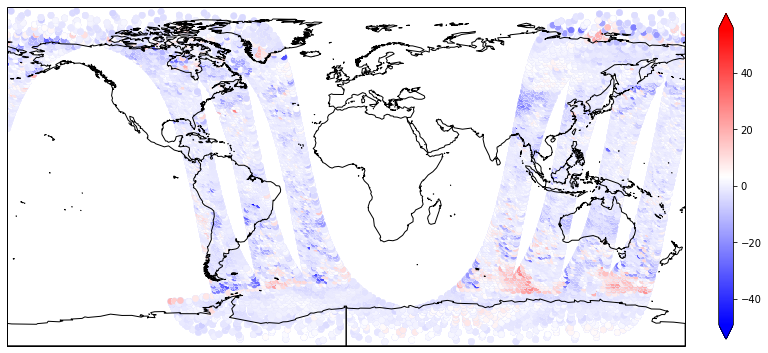

In [27]:
plt.figure(figsize=(15,12))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))
ax.add_feature(cfeature.GSHHSFeature(scale='auto'))
ax.set_extent([-180, 180, -90, 90])

cs = plt.scatter(lons, lats, c=data, s=30, cmap='bwr',
                transform=ccrs.PlateCarree())

cb = plt.colorbar(cs, shrink=0.5, pad=.04, extend='both')

Tada! We have a spatial plot. However, be weary that this plot has > 130,000 observations between 15 channels. Most of the data you are actually seeing is the channel 15 values stacked on top of the other channels, so lets plot all the channels to see what each one looks likes.

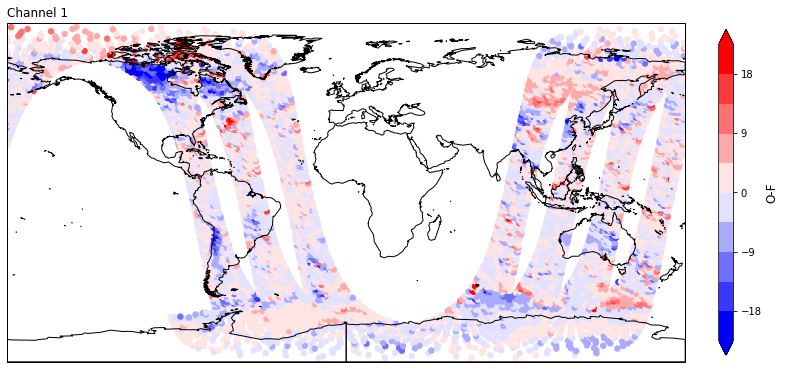

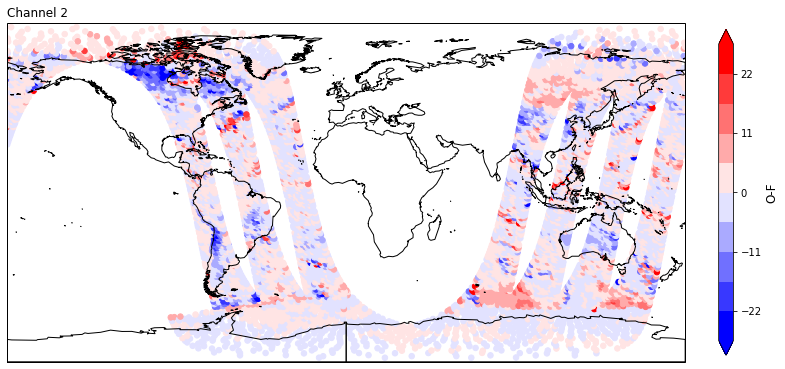

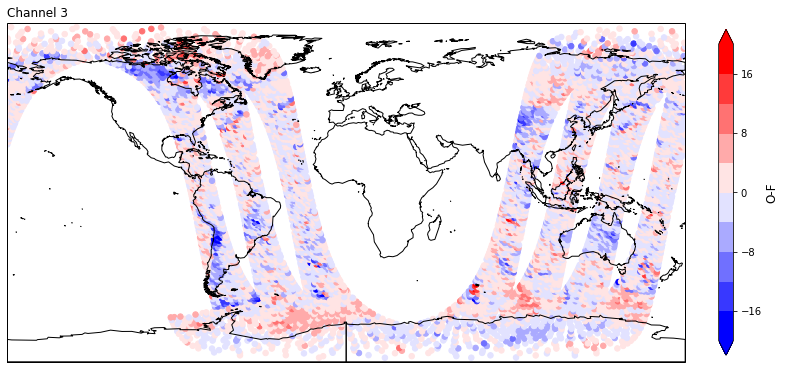

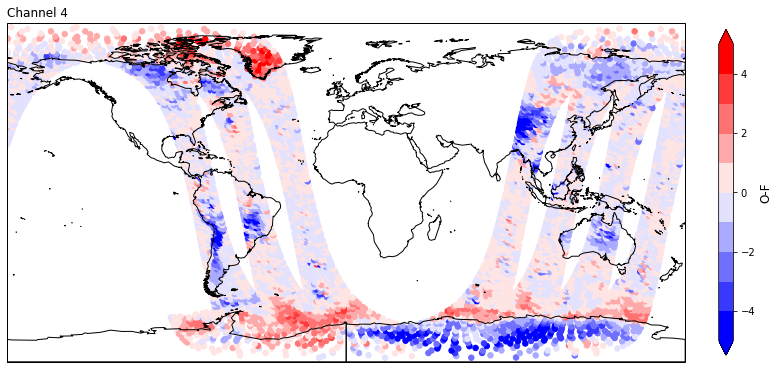

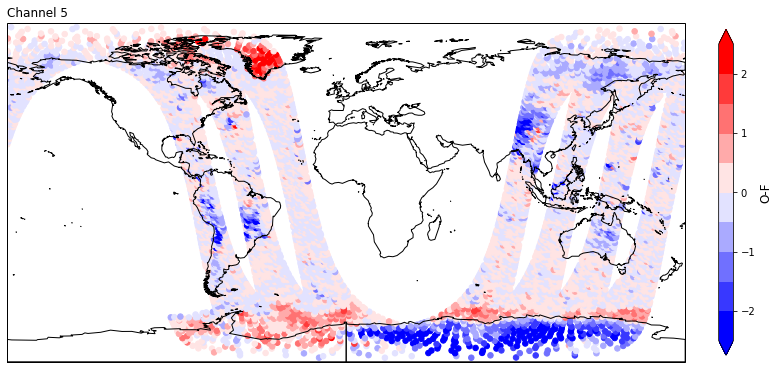

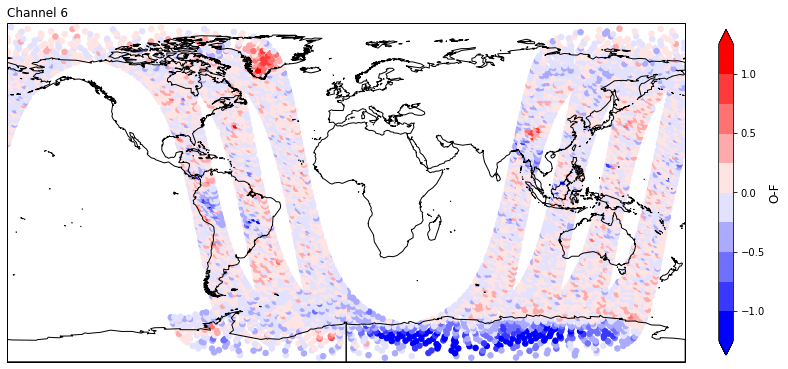

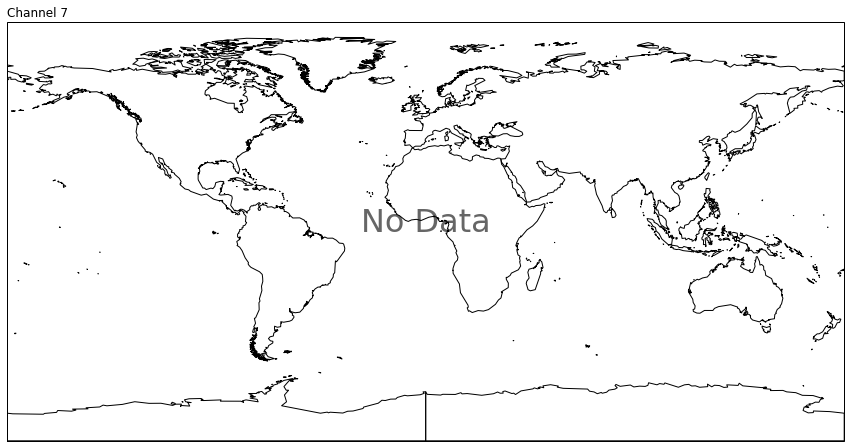

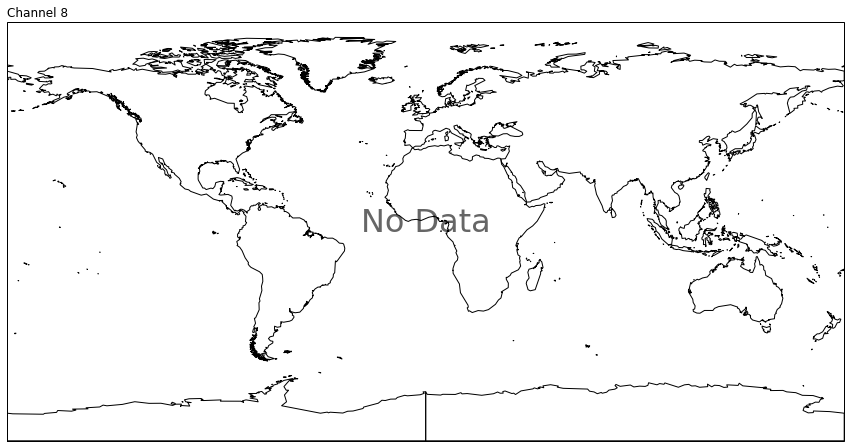

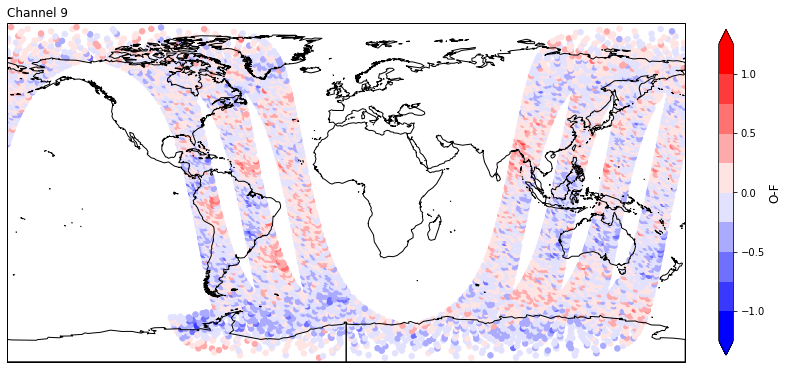

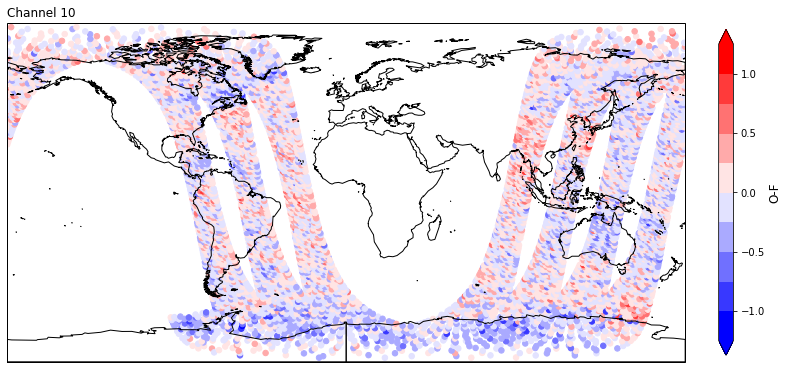

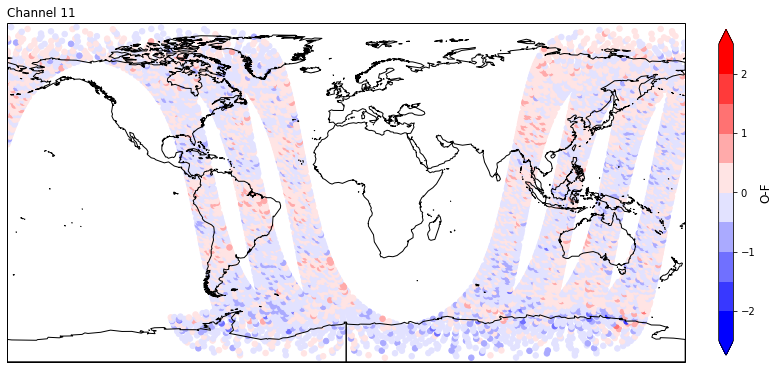

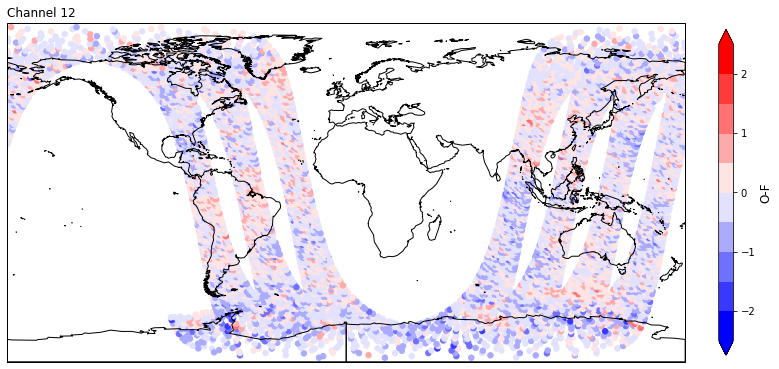

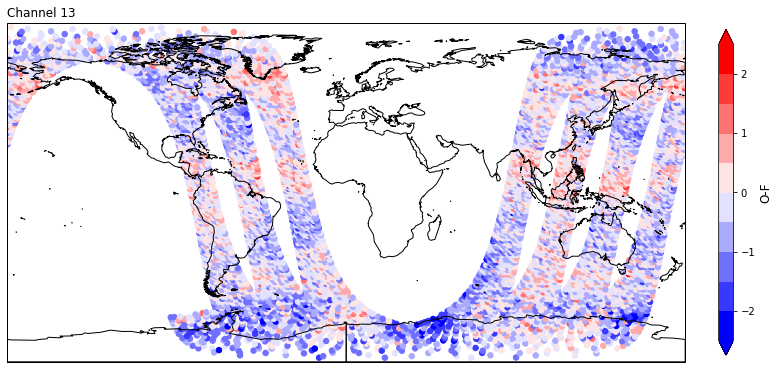

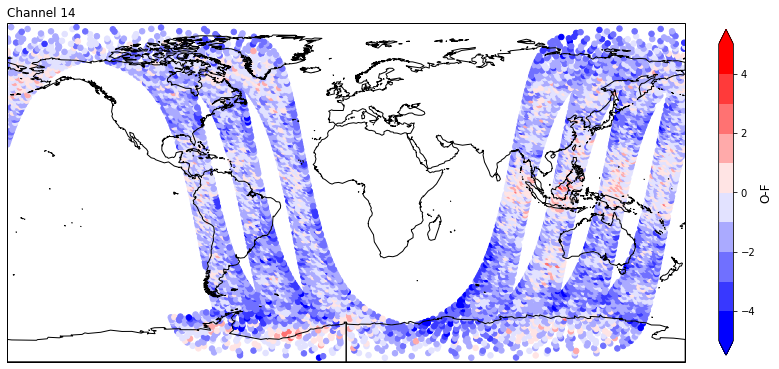

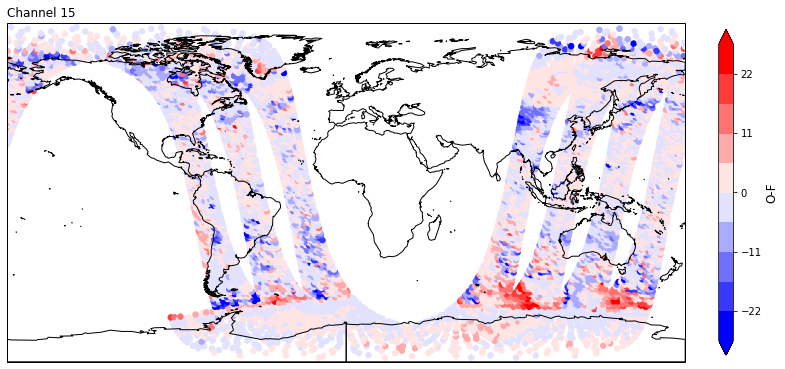

In [28]:
data_type = 'O-F'
channels = np.arange(1,16,1)
QC_flag = []

for channel in channels:    
    data = diag.get_data(data_type, channel, QC_flag)
    
    if len(np.where(np.isnan(data))[0]) != len(data):

        lats, lons = diag.get_lat_lon(channel=channel, qcflag=QC_flag)

        std = np.nanstd(data)
        upperbound = (np.round(std*2)/2)*5

        if upperbound == 0:
            upperbound =(np.round(std*4)/4)*5

        lowerbound = 0-upperbound
        bins = (upperbound - lowerbound)/10

        norm = mcolors.BoundaryNorm(boundaries=np.arange(lowerbound, upperbound+bins, bins), ncolors=256)

        plt.figure(figsize=(15,12))
        ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))
        ax.add_feature(cfeature.GSHHSFeature(scale='auto'))
        ax.set_extent([-180, 180, -90, 90])

        cs = plt.scatter(lons, lats, c=data, s=30, cmap='bwr', norm=norm,
                        transform=ccrs.PlateCarree())

        cb = plt.colorbar(cs, shrink=0.5, pad=.04, extend='both')
        cb.set_label('O-F', fontsize=12)
        
        plt.title('Channel %s' % channel, loc='left')
    
    else:
        fig = plt.figure(figsize=(15,12))
        ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=0))

        ax.add_feature(cfeature.GSHHSFeature(scale='auto'))
        ax.set_extent([-180, 180, -90, 90])

        ax.text(0,0, 'No Data', fontsize=32, alpha=0.6, ha='center')
        
        plt.title('Channel %s' % channel, loc='left')

You can see the different channels have different values as well as colorbars based on a way to determine binsizes based on standard deviation. You can also see that Channel 7 and Channel 8 did not return data, therefore were not plotted. However in the next plot, you can see that there were far fewer observations that were considered good (QC_flag = [0]).

Text(0.0, 1.0, 'Channel 1 with applied QC Flag: 0')

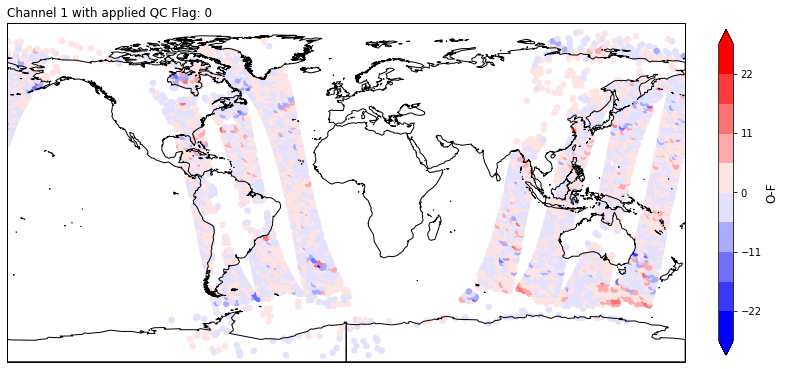

In [30]:
channel = [1]
QC_flag = [0]

new_data = diag.get_data(data_type, channel=channel, qcflag=QC_flag)

lats, lons = diag.get_lat_lon(channel=channel, qcflag=QC_flag)

plt.figure(figsize=(15,12))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))
ax.add_feature(cfeature.GSHHSFeature(scale='auto'))
ax.set_extent([-180, 180, -90, 90])

std = np.nanstd(data)
upperbound = (np.round(std*2)/2)*5

if upperbound == 0:
    upperbound =(np.round(std*4)/4)*5

lowerbound = 0-upperbound
bins = (upperbound - lowerbound)/10

norm = mcolors.BoundaryNorm(boundaries=np.arange(lowerbound, upperbound+bins, bins), ncolors=256)

cs = plt.scatter(lons, lats, c=new_data, s=30, cmap='bwr', norm=norm,
                transform=ccrs.PlateCarree())

cb = plt.colorbar(cs, shrink=0.5, pad=.04, extend='both')
cb.set_label('O-F', fontsize=12)
        
plt.title('Channel %s with applied QC Flag: %s' % (channel[0], QC_flag[0]), loc='left')

## Advanced Capabilities
Above gave some basic capabilities that PyGSI can offer. However, there are some scripts that are included in the Github repository that can do more complicated tasks like spatial binning, saving data to netCDF's and plotting in batch scripts. To use these applications, we need to introduce a YAML file. As we saw above, the inputs for conventional data and radiance data are different, therefore so should their YAML files.  
  
#### Conventional YAML
```
diagnostic:
- conventional input:
    path:
    - /path/to/diag/data/gdas.20200920/00/atmos/diag_conv_t_ges.2020092000.nc4
    data type:
    - O-F
    observation id:
    - 120
    observation subtype:
    - 0
    analysis use:
    - true
    plot type:
    - histogram
    - spatial
```
#### Radiance YAML
```
diagnostic:
- radiance input:
    path:
    - /path/to/diag/data/gdas.20200920/00/atmos/diag_amsua_n15_ges.2020092000.nc4
    data type:
    - O-F
    channel:
    - 1
    qc flag:
    - 0
    plot type: 
    - histogram
    - spatial
```  
Each input can be changed to your liking. Just like the example above though, the path to the data and the data type must be included.  
### plot_gsi.py
This script takes information from either a conventional or radiance yaml file and can plot either histograms, spatial plots, or both depending on the inputs. plot_gsi.py utilizes Diags.py and plotDiags.py. If you are interested in what these do, they can be found in the pyGSI directory when you cloned the PyGSI repository.  
  
plot_gsi.py requires two inputs: the path to the YAML file and the out directory you would like to save the images. The path to the YAML file is required and the script will not run without it. The out directory default is the directory in which the plot_gsi.py is saved ('./'). To run this code with the sample files provided in Github:  
  
```$ python plot_gsi.py -y path/to/PyGSI/single_conv_yaml.yaml -o ./```  
  
* Note: if using conventional yaml file and analysis use is True, two figures per plot type will be created. One will be for assimilated data and one will be for monitored data  
  
```$ python plot_gsi.py -y path/to/PyGSI/single_sat_yaml.yaml -o ./```

### Using SLURM for Batch Scripting
PyGSI also offers the capability to do large batch scripts and use multiprocessing. So far there are four scripts this can be used for:  
1. `mp_plot_conv_diags.py`
2. `mp_plot_sat_diags.py`
3. `create_conv_netcdf.py`
4. `create_sat_netcdf.py`  
  
#### mp_plot_conv_diags.py and mp_plot_sat_diags.py
These scripts are essentially the same as plot_gsi.py, but can utilize multiple processors and output hundreds of plots in a short amount of time. PyGSI includes two shell scripts that can run these very easily with only needing to change a few lines:  
* `batch_conv_diags.sh`
* `batch_sat_diags.sh`  
  
Using these shell scripts, all you need to do is change the `PyGSIdir`, `OUTDIR`, and `YAML` inputs. However, it would be a hassle to create a YAML with every option of conventional and radiance files. Don't worry, Cory Martin has created scripts that can create this type of YAML very quickly. If using Hera:  
  
Conventional data:  
```$ python /scratch1/NCEPDEV/da/Cory.R.Martin/GitHub/DARTH/ush/convinfo2yaml.py -d /path/to/GSI/netcdf/files -c cycle (YYYYMMDDHH) -i /scratch1/NCEPDEV/da/Cory.R.Martin/Workflows/GFSv16/sorc/gsi.fd/fix/global_convinfo.txt -y path/to/output/yaml/file/yaml_file.yaml```  
  
Radiance data:  
```$ python /scratch1/NCEPDEV/da/Cory.R.Martin/GitHub/DARTH/ush/satinfo2yaml.py -d /path/to/GSI/netcdf/files -c cycle (YYYYMMDDHH) -i /scratch1/NCEPDEV/da/Cory.R.Martin/Workflows/GFSv16/sorc/gsi.fd/fix/global_satinfo.txt -y path/to/output/yaml/file/yaml_file.yaml``` 
  
Fill in the appropriate inputs, and a yaml file will be created to use for this batch script.

#### create_conv_netcdf.py and create_sat_netcdf.py
These scripts use the same yaml file created using the steps above and read the data, calculate basic statistics such as n, mean, min, max, standard deviation, RMSE and spatially bin the data. It also has the capability of binning by pressure as well. The two shell scripts that can run these scripts are:  
* `batch_write_ncfile_conv.sh`
* `batch_write_ncfile_sat.sh`  
  
Similar to the other batch scripts used above, all you need to change is the `PyGSIdir`, `OUTDIR`, and `YAML` inputs.

## Other ways to Utilize PyGSI

#### Using spatialBin to plot_binned_spatial
The code below utilizes multiple functions from PyGSI to read, spatially bin, and plot spatially averaged conventional temperature data from rawindsondes. The result should be saved to the current directory.

In [1]:
import numpy as np
import yaml
from pyGSI.diags import Conventional
from pyGSI.spatial_bin import spatial_bin
from pyGSI.plot_diags import plot_binned_spatial

YAML = '/scratch1/NCEPDEV/da/Kevin.Dougherty/PyGSI/single_conv_yaml.yaml'
file = open(YAML)
parsed_yaml_file = yaml.load(file, Loader=yaml.FullLoader)
parsed_YAML = parsed_yaml_file['diagnostic'][0]

# Parsed YAML file broken up into variables
diagFile = parsed_YAML['conventional input']['path'][0]
DataType = parsed_YAML['conventional input']['data type'][0]
ObsID    = parsed_YAML['conventional input']['observation id']
Subtype  = parsed_YAML['conventional input']['observation subtype']
AnlUse   = parsed_YAML['conventional input']['analysis use'][0]

diag = Conventional(diagFile)

# Grab data
data = diag.get_data(DataType, obsid=ObsID, subtype=Subtype, analysis_use=AnlUse)

# Only use assimilated data
data = data['assimilated']
lats, lons = diag.get_lat_lon(obsid=ObsID, subtype=Subtype, analysis_use=AnlUse)

#Grab metadata and save variables to metadata dictionary
metadata = diag.get_metadata()

metadata['Data_type'] = DataType   
metadata['ObsID'] = ObsID
metadata['Subtype'] = Subtype

metadata['assimilated'] = 'yes'
lat = lats['assimilated']
lon = lons['assimilated']

# Bin assimilated data. To save time, lets do a very course binning of 5x5
binnedData = spatial_bin(data, lat, lon, binsize='5x5')

# Plot a spatial map with new binned data
plot_binned_spatial(binnedData['binned_mean'], metadata, binsize='5x5', outdir='./')